In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('C:/Users/sathi/Downloads/1577429980_walmart_store_sales/Walmart_Store_sales.csv')

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Analysis Tasks - Basic Statistics tasks

1.Which store has maximum sales

2.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3.Which store/s has good quarterly growth rate in Q3’2012

4.Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5.Provide a monthly and semester view of sales in units and give insights

In [7]:
#1.Which store has maximum sales
df_grouped = df.groupby('Store')['Weekly_Sales'].sum()
print('\033[1m 1. The Store',df_grouped.idxmax(),'has the maximum sales which sums up to',max(df.groupby('Store')['Weekly_Sales'].sum()))

 1. The Store 20 has the maximum sales which sums up to 301397792.46000004


In [8]:
df_std = pd.DataFrame(df.groupby('Store').agg({'Weekly_Sales':['std','mean']}))

In [9]:
df_std.idxmax()

Weekly_Sales  std     14
              mean    20
dtype: int64

In [10]:
#2.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
print('\033[1m 2. The store',df_std[('Weekly_Sales',  'std')].idxmax(),'has the maximum standard deviation')

 2. The store 14 has the maximum standard deviation


In [11]:
#2.Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
df_std['CoV'] = df_std[('Weekly_Sales',  'std')]/df_std[('Weekly_Sales',  'mean')] * 100

In [12]:
df_std.head()

Weekly_Sales                      CoV
                 std          mean           
Store                                        
1      155980.767761  1.555264e+06  10.029212
2      237683.694682  1.925751e+06  12.342388
3       46319.631557  4.027044e+05  11.502141
4      266201.442297  2.094713e+06  12.708254
5       37737.965745  3.180118e+05  11.866844

In [13]:
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [14]:
df.Date.dtype

dtype('<M8[ns]')

In [15]:
df['quarter'] = df['Date'].dt.quarter

In [113]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1


In [17]:
df[(df['Date'].dt.year == '2012') & (df['quarter'] == 2)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter


In [18]:
df[(df['quarter'] == 2) & (df['Date'].dt.year == 2012)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
113,1,2012-04-06,1899676.88,0,70.43,3.891,221.435611,7.143,2
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143,2
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143,2
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143,2
117,1,2012-05-04,1684519.99,0,75.55,3.749,221.671800,7.143,2
...,...,...,...,...,...,...,...,...,...
6413,45,2012-06-01,837144.63,0,74.48,3.742,191.009171,8.567,2
6414,45,2012-06-08,795133.00,0,64.30,3.689,191.015533,8.567,2
6415,45,2012-06-15,821498.18,0,71.93,3.620,191.029973,8.567,2
6416,45,2012-06-22,822569.16,0,74.22,3.564,191.064610,8.567,2


In [19]:
df[(df['Date'].dt.year == '2012')]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter


In [20]:
quarter2_2012 = df[(df['Date'].dt.to_period('Y')=='2012') & (df['quarter']==2)]

In [21]:
quarter3_2012 = df[(df['Date'].dt.to_period('Y')=='2012') & (df['quarter']==3)]

In [22]:
Q2 = pd.DataFrame(quarter2_2012.groupby('Store')['Weekly_Sales'].sum())

In [23]:
Q3 = pd.DataFrame(quarter3_2012.groupby('Store')['Weekly_Sales'].sum())

In [24]:
Q3_growth = Q2.merge(Q3,on='Store',how='inner')
Q3_growth.rename(columns={'Weekly_Sales_x': 'Q2_Weekly_Sales','Weekly_Sales_y': 'Q3_Weekly_Sales'},inplace=True)

In [25]:
Q3_growth.head()

,Q2_Weekly_Sales,Q3_Weekly_Sales
Store,,
1,20978760.12,20253947.78
2,25083604.88,24303354.86
3,5620316.49,5298005.47
4,28454363.67,27796792.46
5,4466363.69,4163790.99


In [26]:
Q3_growth['Q3_Growth %'] = ((Q3_growth['Q3_Weekly_Sales']-Q3_growth['Q2_Weekly_Sales'])/Q3_growth['Q3_Weekly_Sales'])*100

In [27]:
Q3_growth['Q3_Growth %'] = round(Q3_growth['Q3_Growth %'],2)

In [28]:
Q3_growth.sort_values('Q3_Growth %',ascending=False).head()

,Q2_Weekly_Sales,Q3_Weekly_Sales,Q3_Growth %
Store,,,
7,7290859.27,8262787.39,11.76
16,6564335.98,7121541.64,7.82
35,10838313.00,11322421.12,4.28
26,13155335.57,13675691.91,3.80
39,20214128.46,20715116.23,2.42


3.Which store/s has good quarterly growth rate in Q3’2012?

<b>Store 16<b> has a better growth rate in the Q3'2012

In [29]:
df[(df['Date']=='2010-12-31') | (df['Date']=='2011-12-30') | (df['Date']=='2012-12-28')]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,4
99,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866,4
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163,4
242,2,2011-12-30,1874226.52,1,44.57,3.129,219.177306,7.441,4
333,3,2010-12-31,382677.76,1,53.20,2.943,214.698647,7.564,4
...,...,...,...,...,...,...,...,...,...
6105,43,2011-12-30,505405.85,1,41.83,3.129,211.074055,10.148,4
6196,44,2010-12-31,241937.11,1,26.79,2.868,127.087677,7.610,4
6248,44,2011-12-30,263917.85,1,31.53,3.119,130.071032,6.078,4
6339,45,2010-12-31,679156.20,1,29.67,3.179,182.571448,8.724,4


In [30]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,4


In [31]:
df[(df['Holiday_Flag']==1) & (df['Date'].dt.year == 2010)].Date.dt.date.unique()

array([datetime.date(2010, 2, 12), datetime.date(2010, 9, 10),
       datetime.date(2010, 11, 26), datetime.date(2010, 12, 31)],
      dtype=object)

In [32]:
df[(df['Holiday_Flag']==1) & (df['Date'].dt.year == 2011)].Date.dt.date.unique()

array([datetime.date(2011, 2, 11), datetime.date(2011, 9, 9),
       datetime.date(2011, 11, 25), datetime.date(2011, 12, 30)],
      dtype=object)

In [33]:
df[(df['Holiday_Flag']==1) & (df['Date'].dt.year == 2012)].Date.dt.date.unique()

array([datetime.date(2012, 2, 10), datetime.date(2012, 9, 7)],
      dtype=object)

df.sort_values(by=['Store','Date'])

In [34]:
Holiday_mean = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

In [35]:
Super_Bowl = df[(df['Date']=='2010-02-12') | (df['Date']=='2011-02-11') | (df['Date']=='2012-02-10') | (df['Date']=='2013-02-08')]
Labour_Day = df[(df['Date']=='2010-09-10') | (df['Date']=='2011-09-09') | (df['Date']=='2012-09-07') | (df['Date']=='2013-09-06')]
Thanksgiving = df[(df['Date']=='2010-11-26') | (df['Date']=='2011-11-25') | (df['Date']=='2012-11-23') | (df['Date']=='2013-11-29')]
Christmas = df[(df['Date']=='2010-12-31') | (df['Date']=='2011-12-30') | (df['Date']=='2012-12-28') | (df['Date']=='2013-12-27')]
mean_of_holiday_sales = {'Super Bowl': round(Super_Bowl['Weekly_Sales'].mean(),2),'Labour_Day': round(Labour_Day['Weekly_Sales'].mean(),2),'Thanksgiving':round(Thanksgiving['Weekly_Sales'].mean(),2), 'Christmas' : round(Christmas['Weekly_Sales'].mean(),2), 'Non Holiday Sales':round(Holiday_mean[0],2) }

In [36]:
mean_of_holiday_sales

{'Super Bowl': 1079127.99,
 'Labour_Day': 1042427.29,
 'Thanksgiving': 1471273.43,
 'Christmas': 960833.11,
 'Non Holiday Sales': 1041256.38}

<b>4. The Thanksgiving holiday clearly has higher sales than Non-Holiday season

<b>5.Provide a monthly and semester view of sales in units and give insights

In [37]:
df_monthly = df.groupby(pd.Grouper(key='Date', freq='1M'))['Weekly_Sales'].sum().reset_index()

In [38]:
df_monthly

,Date,Weekly_Sales
0,2010-02-28,1.903330e+08
1,2010-03-31,1.819198e+08
2,2010-04-30,2.314124e+08
3,2010-05-31,1.867109e+08
4,2010-06-30,1.922462e+08
5,2010-07-31,2.325801e+08
6,2010-08-31,1.876401e+08
7,2010-09-30,1.772679e+08
8,2010-10-31,2.171618e+08
9,2010-11-30,2.028534e+08


In [39]:
df_sem = df.groupby(pd.Grouper(key='Date',freq='6M'))['Weekly_Sales'].sum().reset_index()

In [40]:
df_sem

,Date,Weekly_Sales
0,2010-02-28,1.903330e+08
1,2010-08-31,1.212510e+09
2,2011-02-28,1.236079e+09
3,2011-08-31,1.195815e+09
4,2012-02-29,1.263308e+09
5,2012-08-31,1.274168e+09
6,2013-02-28,3.650072e+08


Text(0.5, 1.0, 'Monthly Sales')

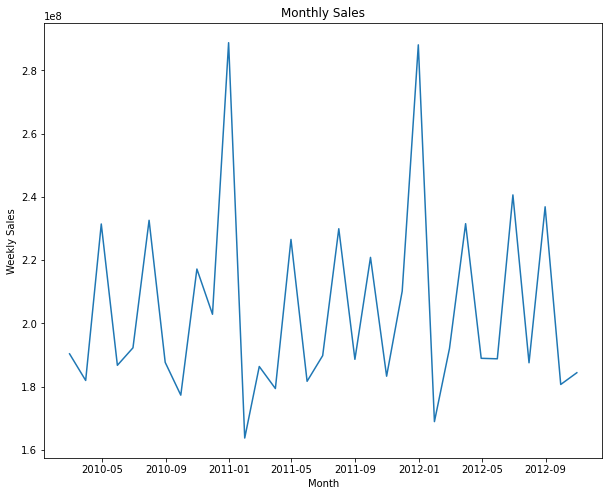

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
x=df_monthly['Date']
y=df_monthly['Weekly_Sales']
plt.plot(x,y)
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Monthly Sales')


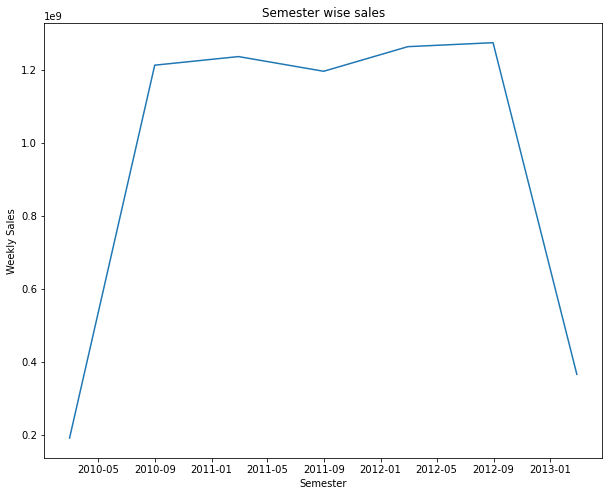

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
x2=df_sem['Date']
y2=df_sem['Weekly_Sales']
plt.plot(x2,y2)
plt.xlabel('Semester')
plt.ylabel('Weekly Sales')
plt.title('Semester wise sales')
plt.show()

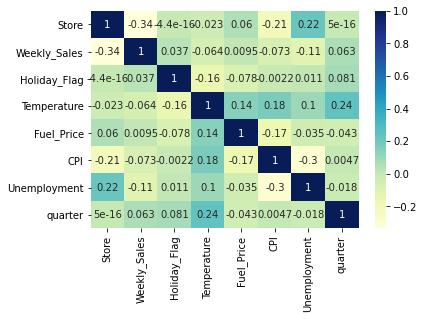

In [43]:
#Correlation of Weekly Sales with other variables 
ax = sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.rcParams["figure.figsize"] = (20,10)

In [44]:
#Missing Values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
quarter         0
dtype: int64

In [45]:
df_latest = df[df['Store']==1].sort_values('Date',ascending=True)

In [46]:
#Converting Date feature into numbers

date_col = df[df['Store']==1][['Date']]
date_col.index += 1
df_latest['Date'] = date_col.index
df_latest.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
0,1,1,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,2,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,3,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,4,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,1


In [47]:
numerical_features= [feature for feature in df.columns if df[feature].dtype!='O']

In [48]:
discrete_variable = [feature for feature in numerical_features if feature not in ['Store','Date','quarter','Weekly_Sales'] and len(df[feature].unique())<25]

In [49]:
continuous_variable= [feature for feature in numerical_features if feature not in discrete_variable + ['Store','Date','quarter','Weekly_Sales']]

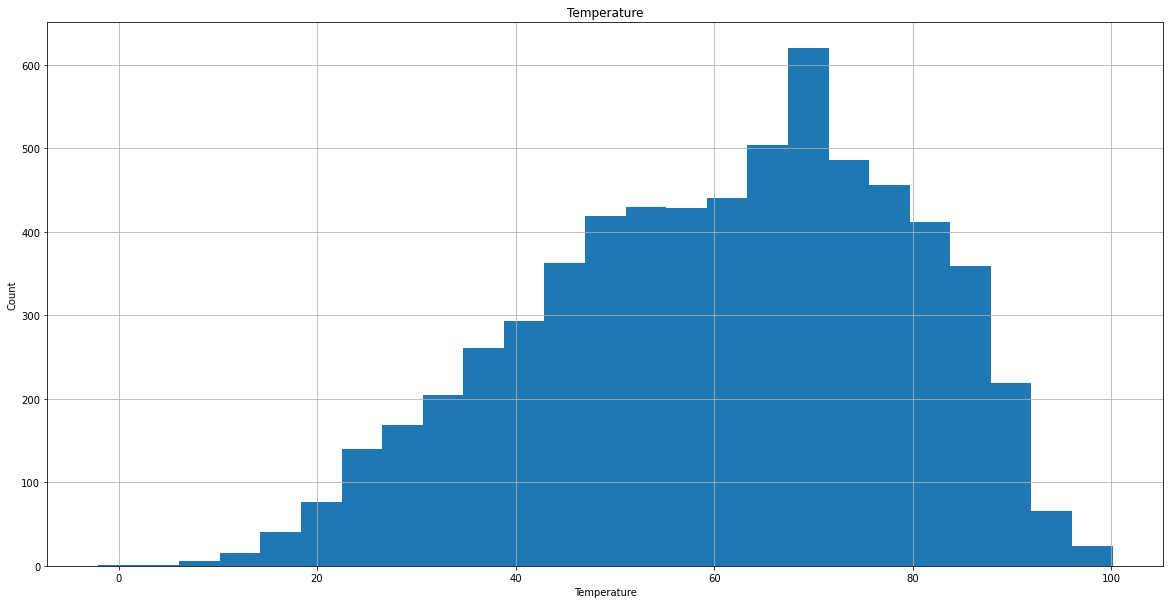

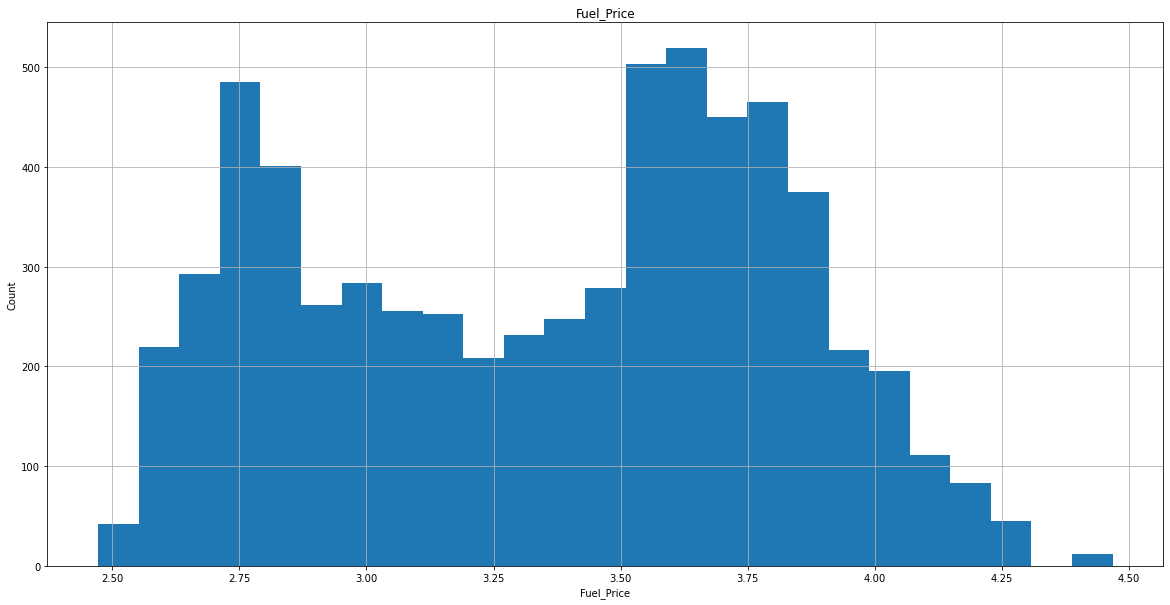

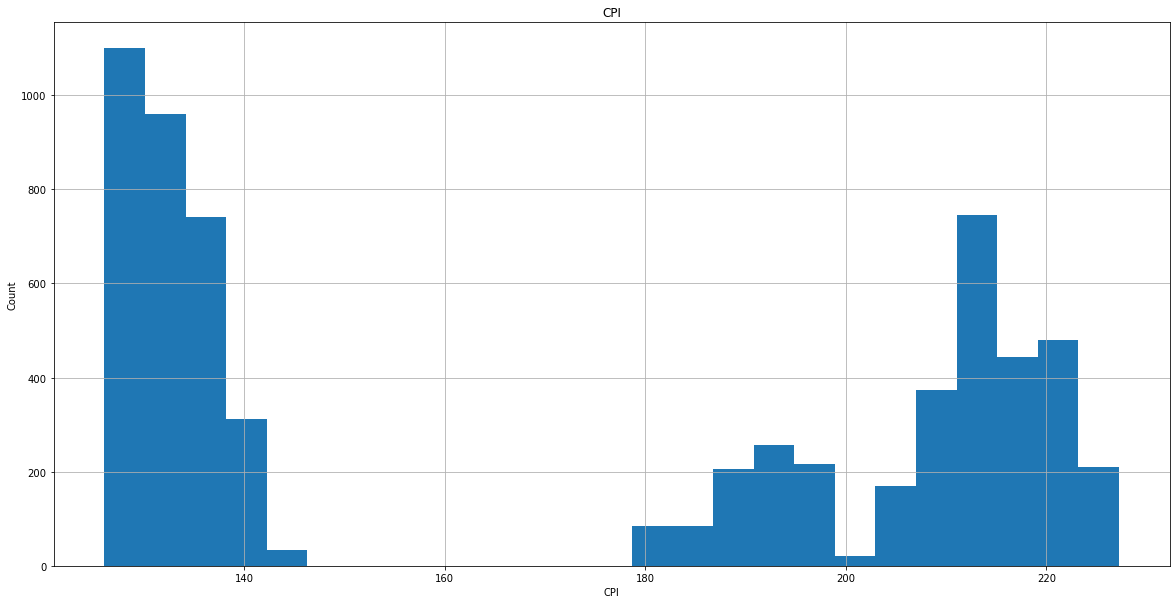

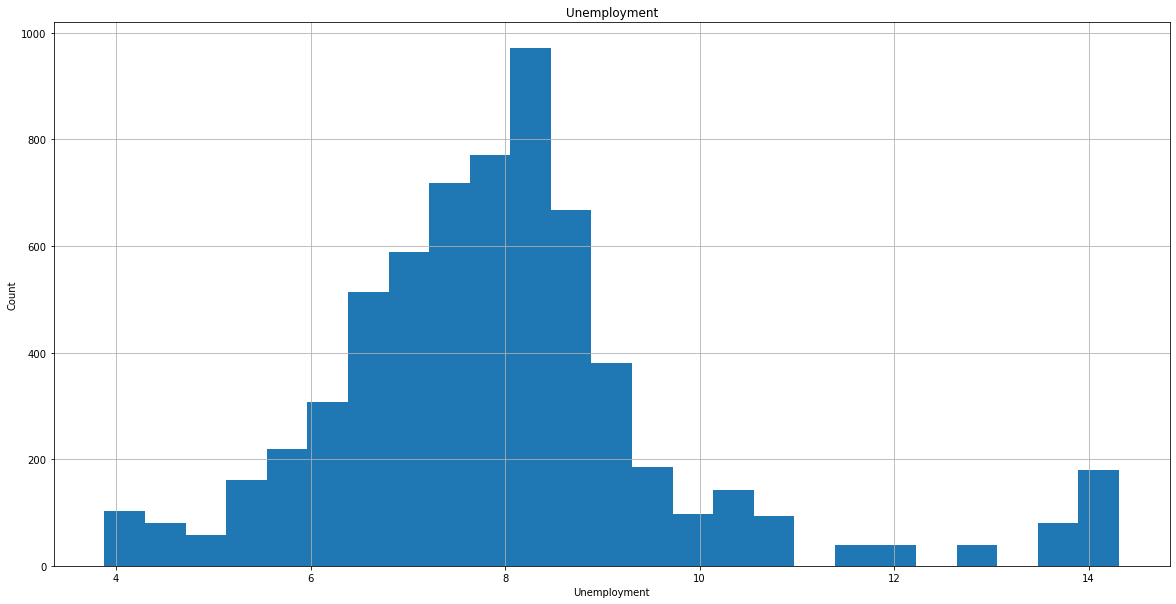

In [79]:
for feature in continuous_variable:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        (data[feature]).hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()
        

C:\Users\sathi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


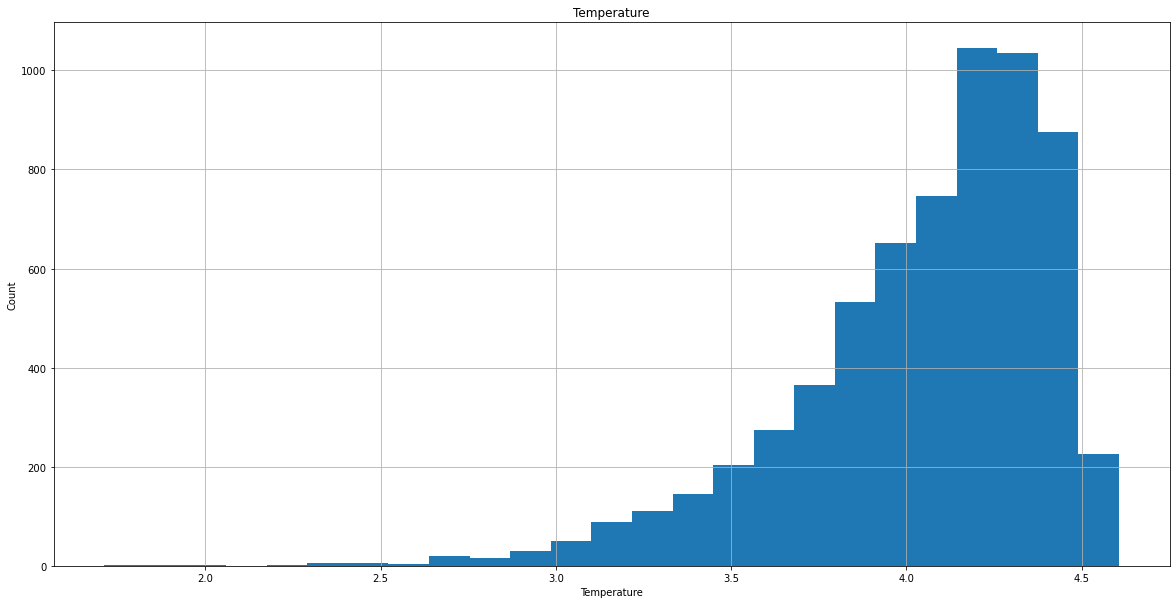

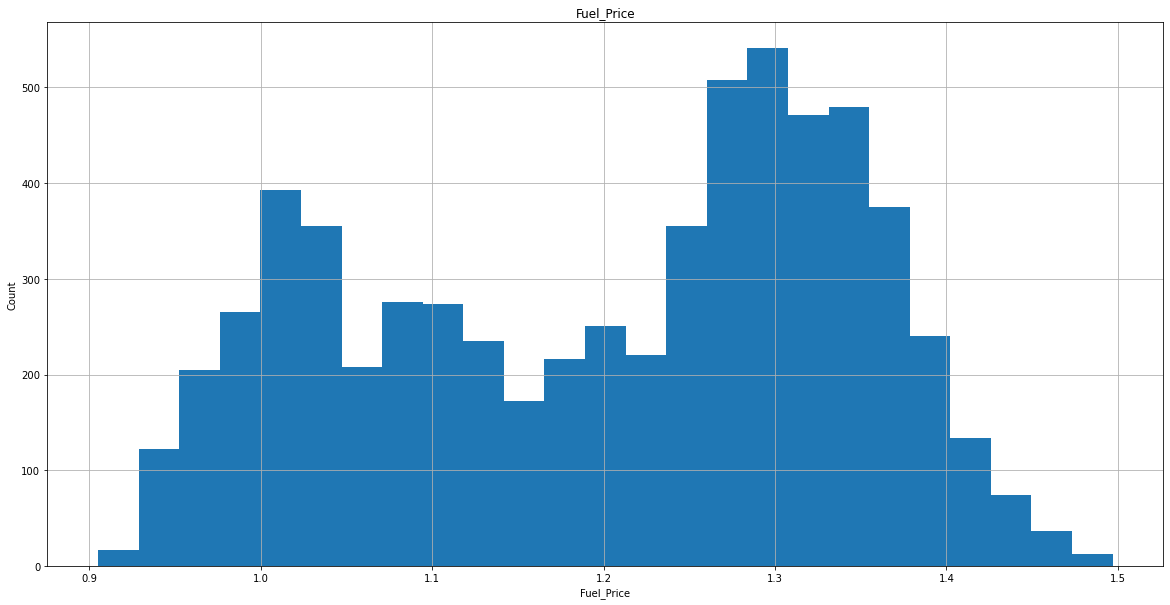

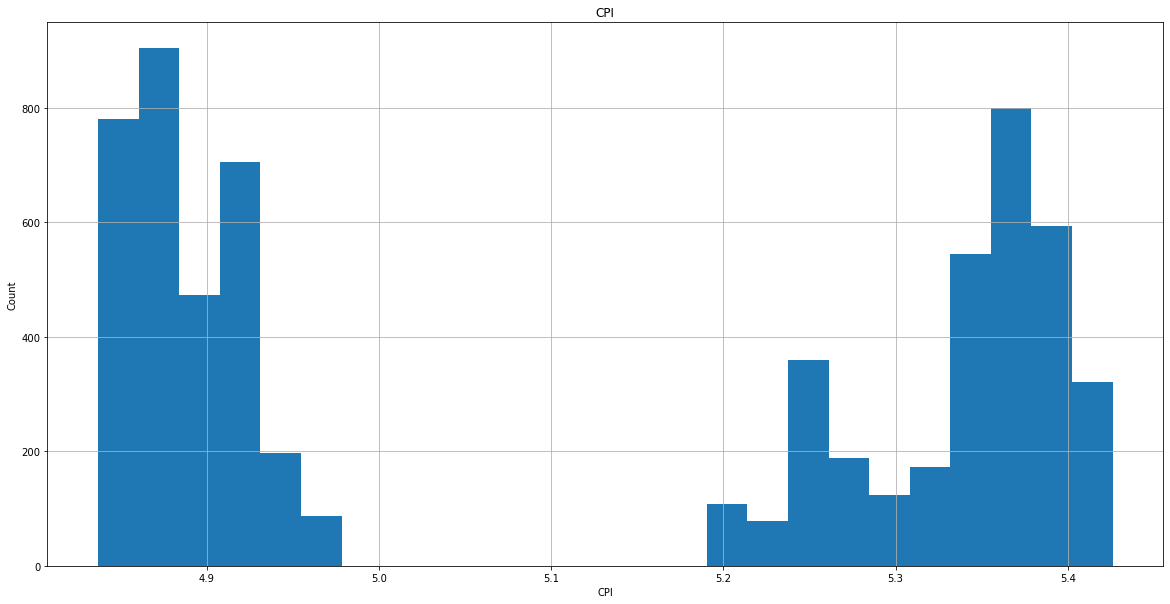

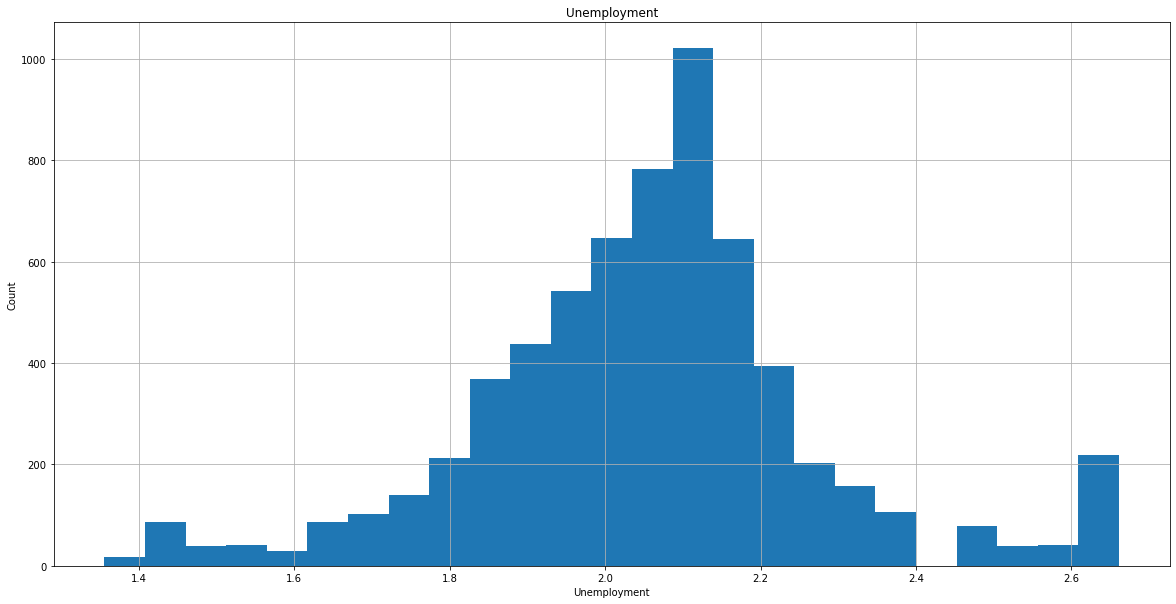

In [50]:
for feature in continuous_variable:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        np.log(data[feature]).hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()
        
    

In [51]:
from tabulate import tabulate

In [84]:
 for feature in continuous_variable:
        if 0 in df[feature].unique():
            pass
        else:
            print('After Log Transformation '+feature,np.log(df[feature]).skew(),'Before Log Transformation',(df[feature].skew()))
pd.DataFrame([(df[continuous_variable].skew()),np.log(df[continuous_variable]).skew()],index=feature,columns=['Before Log Transformation','After Log Transformation'])

After Log Transformation Temperature -1.2585709080122456 Before Log Transformation -0.3367676011075799
After Log Transformation Fuel_Price -0.25814440439559483 Before Log Transformation -0.09615830011865549
After Log Transformation CPI 0.013618977787907077 Before Log Transformation 0.06349184988549494
After Log Transformation Unemployment 0.09970257895662032 Before Log Transformation 1.1881439334843265


TypeError: Index(...) must be called with a collection of some kind, 'Unemployment' was passed

In [53]:
df['Unemployment'].skew()

1.1881439334843265

In [585]:
 for feature in continuous_variable[0:3]:
        if 0 in df[feature].unique():
            pass
        else:
            df[feature]=np.log(data[feature])
        

In [586]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
0,1,2010-02-05,1643690.90,0,1.320428,-0.056905,1.677529,8.11,1
1,1,2010-02-12,1641957.44,1,1.294979,-0.066879,1.677658,8.11,1
2,1,2010-02-19,1611968.17,0,1.304848,-0.081346,1.677700,8.11,1
3,1,2010-02-26,1409727.59,0,1.346057,-0.061452,1.677727,8.11,1
4,1,2010-03-05,1554806.68,0,1.345330,-0.035543,1.677754,8.11,1


In [ ]:
for feature  in df[continuous_variable]:
    df[feature] = round(df[feature],2)

0

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[continuous_variable],df['Weekly_Sales'],test_size=0.3)

In [576]:
x_train.head()

,Temperature,Fuel_Price,CPI,Unemployment
954,2.41,1.20,5.28,8.51
998,3.72,1.32,5.29,7.56
4159,4.20,1.02,5.35,8.20
877,3.96,0.98,5.24,8.96
911,2.33,1.11,5.26,8.82


In [87]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred = linreg.predict(x_test)

In [91]:
np.all(np.isfinite(df))
np.any(np.isnan(df))

False

In [96]:
from sklearn import metrics
linreg.score(x_test,y_test)

0.020233979825437176

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 463557.067967816
Mean Squared Error: 301726772584.7323
Root Mean Squared Error: 549296.6162145297


In [105]:
import statsmodels.formula.api as smf
lm = smf.ols('Weekly_Sales~Temperature+Fuel_Price+CPI+Unemployment', data).fit()

In [106]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     40.09
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           3.21e-33
Time:                        13:36:58   Log-Likelihood:                -94273.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6430   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.744e+06   7.96e+04     21.918      0.000    1.59e+06     1.9e+06
Temperature   -885.6699    396.195     -2.235      0.025   -1662.345    -108.995
Fuel_Price   -1.225e+04   1.58e+04     -0.778      0.437   -4.31e+04    1.86e+04
CPI          -1585.8180    195.164     -8.126      0.000   -1968.404   -1203.232
Unemployment -4.121e+04   3972.667    -10.375      0.000    -4.9e+04   -3.34e+04
==============================================================================
Omnibus:                      370.623   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.779
Skew:                           0.639   Prob(JB):                     8.66e-96
Kurtosis:                       3.010   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Since, CPI and Unemployment has less p-value. It is statistically significant and has impact on Sales

In [117]:
df['Day'] = df['Date'].dt.day_name()

In [118]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,Friday
